In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df= pd.read_csv('driver-data.csv')

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [7]:
df.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

Text(0, 0.5, 'Speed')

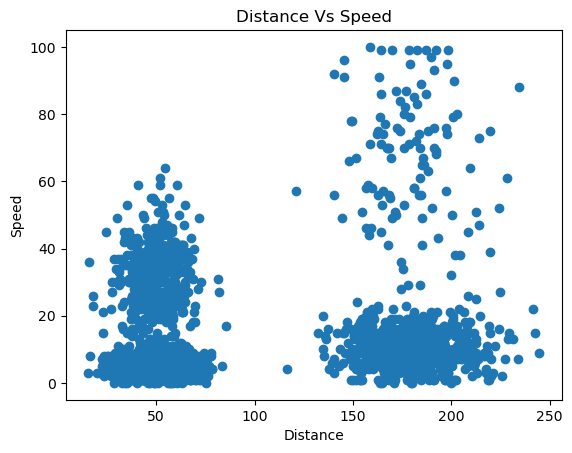

In [11]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.title('Distance Vs Speed')
plt.xlabel("Distance")
plt.ylabel("Speed")

In [12]:
from sklearn.cluster import KMeans

In [13]:
km=KMeans(n_clusters=2)

In [15]:
pred=km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
pred

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
df['cluster']=pred
df.head()

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0


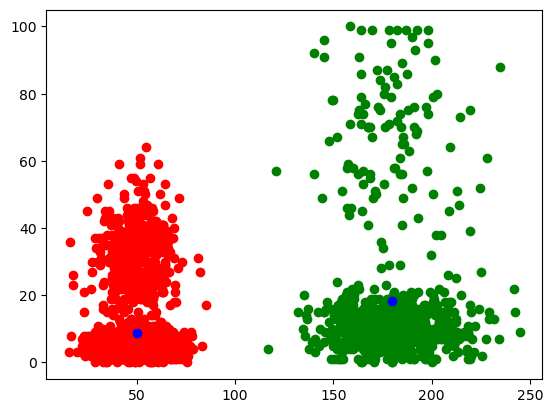

In [24]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]

plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='r')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='g')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
           color='blue')


In [40]:
wcss=[]
k_range=range(1,11)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    wcss.append(km.inertia_)

In [41]:
wcss

[12184626.129627973,
 1316420.850947719,
 992634.0606702473,
 719601.1096991897,
 534719.4787608907,
 372842.782145849,
 319792.42074758676,
 276877.72016540135,
 252773.47931260962,
 230892.198259536]

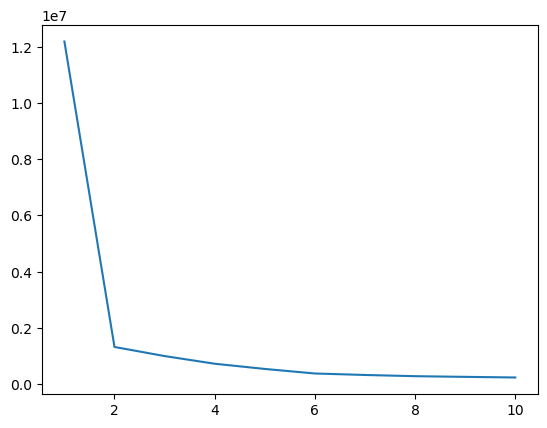

In [43]:
plt.plot(k_range,wcss)

In [ ]:
As per above elbow method the ideal k cluster is 2...